<a href="https://colab.research.google.com/github/LealDias/Mentorama---Aulas/blob/master/Li%C3%A7%C3%A3o%20de%20Casa%20-%20Tarefa%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 1

# Importação das Bibliotecas para Uso no Projeto

In [29]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import GridSearchCV

### Obtenção dos Dados mnist da Biblioteca Keras

11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

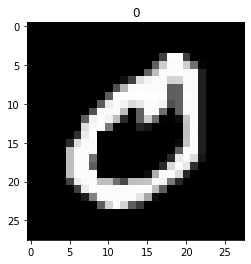

In [4]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

### Mudando as Dimensões dos Dados. Como as Imagens possuem 28x28, teremos um arrray com 784.

In [5]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

### Problema: Os dados gerados automaticamente pela mnis.load_data() gera dados com 60000 para teste e 10000 para treino. Vamos tratar esse dado de forma a concatenar os dados para um split futuro.

In [6]:
X = np.concatenate((X_treinamento, X_teste) , axis = 0)
len(X) #Juntando os Eixos X para a devida divisão de 30% para teste e 70 para treino.

70000

In [7]:
y = np.concatenate((y_treinamento, y_teste) , axis = 0)
len(y) #Juntando os Eixos y para a devida divisão de 30% para teste e 70 para treino.

70000

In [8]:
# Transformação dos dados para float para podermos normalizar os dados
X = X.astype('float32')

In [9]:
# Normalização (255 é o valor máximo de um pixel)
X /= 255

In [10]:
# Transformação para o formato dummy (temos 10 classes)
y = np_utils.to_categorical(y, 10)
len(y)

70000

## Divisão dos Dados em Treino (80%) e Teste (20%).

In [11]:
# Divisão da base de dados entre treinamento e teste (20% para testar e 80% para treinar)
X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Modelo para Classificação: Aplicando Cross Validation K=5

In [34]:
inputs = np.concatenate((X_treino, X_test), axis=0)
targets = np.concatenate((y_treino, y_test), axis=0)

In [35]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(inputs, targets):

# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
    modelo = Sequential()
    modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(units = 64, activation = 'relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(units = 64, activation = 'relu'))
    modelo.add(Dropout(0.2))
    #camada de saida, softmax probabilidade
    modelo.add(Dense(units = 10, activation = 'softmax'))

    modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])
    
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = modelo.fit(X_treino, y_treino,
              batch_size=49,
              epochs=20,
              verbose=2)

  # Generate generalization metrics
    scores = modelo.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {modelo.metrics_names[0]} of {scores[0]}; {modelo.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
  # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
1143/1143 - 3s - loss: 0.4924 - accuracy: 0.8478 - 3s/epoch - 3ms/step
Epoch 2/20
1143/1143 - 3s - loss: 0.2399 - accuracy: 0.9298 - 3s/epoch - 2ms/step
Epoch 3/20
1143/1143 - 3s - loss: 0.1944 - accuracy: 0.9447 - 3s/epoch - 2ms/step
Epoch 4/20
1143/1143 - 3s - loss: 0.1713 - accuracy: 0.9497 - 3s/epoch - 2ms/step
Epoch 5/20
1143/1143 - 3s - loss: 0.1540 - accuracy: 0.9553 - 3s/epoch - 2ms/step
Epoch 6/20
1143/1143 - 3s - loss: 0.1416 - accuracy: 0.9588 - 3s/epoch - 2ms/step
Epoch 7/20
1143/1143 - 3s - loss: 0.1329 - accuracy: 0.9617 - 3s/epoch - 2ms/step
Epoch 8/20
1143/1143 - 3s - loss: 0.1238 - accuracy: 0.9635 - 3s/epoch - 2ms/step
Epoch 9/20
1143/1143 - 3s - loss: 0.1185 - accuracy: 0.9649 - 3s/epoch - 2ms/step
Epoch 10/20
1143/1143 - 3s - loss: 0.1118 - accuracy: 0.9662 - 3s/epoch - 2ms/step
Epoch 11/20
1143/1143 - 3s - loss: 0.1089 - accuracy: 0.9681 - 3s/epoch - 2ms/step

In [36]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                50240     
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 dropout_53 (Dropout)        (None, 64)                0         
                                                                 
 dense_73 (Dense)            (None, 10)              

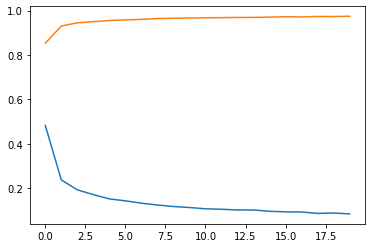

In [37]:
# Gráfico para visualizar os erros e accuracy
history.history.keys()
#evolução do erro, azul
plt.plot(history.history['loss'])
#performance da rede
plt.plot(history.history['accuracy'])

In [38]:
# Obtenção das previsões 
previsoes = modelo.predict(X_test)
previsoes

array([[9.9860805e-01, 8.6274738e-09, 5.6400127e-06, ..., 2.8974142e-07,
        3.6083995e-06, 5.7073280e-06],
       [6.5617164e-11, 9.2306855e-09, 2.5155240e-08, ..., 8.9290342e-07,
        1.8114761e-09, 6.7585302e-06],
       [5.9143308e-11, 9.9998689e-01, 1.2215039e-08, ..., 3.7591469e-06,
        6.1017040e-06, 2.3366376e-06],
       ...,
       [8.9096119e-11, 2.0614224e-09, 2.3483520e-09, ..., 9.9999106e-01,
        3.9672263e-12, 8.9810219e-06],
       [2.0863568e-13, 4.5957973e-12, 4.4132450e-10, ..., 8.4639400e-11,
        3.9138987e-12, 4.4252335e-09],
       [1.2583938e-10, 2.0997616e-10, 5.2249414e-09, ..., 1.3636077e-13,
        3.9142858e-09, 2.2612528e-13]], dtype=float32)

In [39]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_test]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[1373,    0,    2,    1,    0,    2,    7,    0,    2,    0],
       [   0, 1560,    2,    3,    0,    0,    4,    2,    8,    1],
       [   3,    3, 1415,    3,    4,    2,    1,    8,    3,    1],
       [   1,    6,   25, 1360,    0,   30,    0,    6,    4,    3],
       [   3,    1,    3,    1, 1311,    0,    8,    8,    0,   15],
       [   1,    1,    3,    6,    0, 1200,    7,    1,    8,    4],
       [   9,    0,    1,    0,    2,   11, 1362,    0,    2,    0],
       [   1,    6,   16,    1,    4,    3,    0, 1418,    2,    7],
       [  10,   18,    9,    6,    3,   10,    3,    0, 1302,    7],
       [   4,    0,    0,    6,   15,    9,    0,   14,    5, 1308]])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

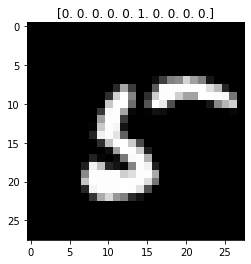

In [115]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 5
y_treino[20]
plt.imshow(np.reshape(X_treino[20], (28,28)), cmap = 'gray') #Imagem a ser Prevista
plt.title(y_treino[20])


In [42]:
#passo a mesma posição para o modelo prever
novo = X_treino[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
novo

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [43]:
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
print("O Valor Previsto é:  ", pred)

O Valor Previsto é:   [5]


Text(0.5, 1.0, '[5]')

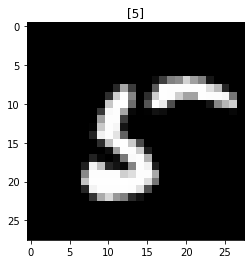

In [122]:
plt.imshow(np.reshape(novo, (28,28)), cmap = 'gray') #Imagem a ser Prevista
plt.title(pred)

## Utilização do Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [76]:
# Function to create model, required for KerasClassifier
def create_model(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    model = Sequential()
    model.add(Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(Dense(hidden_layer_size, activation="relu", input_dim = 784))
        model.add(Dropout(dropout))
        model.add(Dense(hidden_layer_size, activation="relu"))
        model.add(Dropout(dropout))
    model.add(Dense(10, activation = 'softmax' ))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])
    
    return model

# Seed randomico para reprodutividade padronizada
seed = 7
np.random.seed(seed)

# Criação do Modelo
modelo_k = KerasClassifier(
    model=create_model,
    optimizer__lr=0.1,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.5,
    verbose=True,
)

# Definição dos Hiperparâmetros
params = {
    'optimizer__lr': [0.05, 0.1],
    'model__hidden_layer_sizes': [(100, ), (50, 50, )],
    'model__dropout': [0, 0.5],
}

grid = GridSearchCV(estimator=modelo_k, param_grid= params, n_jobs= -1, cv=5)
grid_result = grid.fit(X_treino, y_treino)

# Resultado
print("Melhores Parâmetros: " , grid_result.best_score_, grid_result.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


1750/1750 [==============================] - 6s 3ms/step - loss: 0.2424 - accuracy: 0.9293
Melhores Parâmetros:  0.955482142857143 {'model__dropout': 0, 'model__hidden_layer_sizes': (100,), 'optimizer__lr': 0.1}


Execução do Modelo utilizando os melhores parâmentros

In [77]:
# Função para criação do modelo. Necessário no Keras Classifier
def create_model(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    model = Sequential()
    model.add(Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(Dense(hidden_layer_size, activation="relu", input_dim = 784))
        model.add(Dropout(dropout))
        model.add(Dense(hidden_layer_size, activation="relu"))
        model.add(Dropout(dropout))
    model.add(Dense(10, activation = 'softmax' ))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])
    
    return model


# Modelo
modelo_k = KerasClassifier(
    model=create_model,
    optimizer__lr=0.1,
    model__hidden_layer_sizes=(100,),
    model__dropout=0,
    verbose=True,
)


Modelo em Produção

In [78]:
modelo_param = modelo_k.fit(X_treino, y_treino,
              batch_size=49,
              epochs=20,
              verbose=2)

Epoch 1/20
1143/1143 - 3s - loss: 0.2726 - accuracy: 0.9198 - 3s/epoch - 3ms/step
Epoch 2/20
1143/1143 - 3s - loss: 0.1133 - accuracy: 0.9656 - 3s/epoch - 3ms/step
Epoch 3/20
1143/1143 - 3s - loss: 0.0795 - accuracy: 0.9754 - 3s/epoch - 3ms/step
Epoch 4/20
1143/1143 - 4s - loss: 0.0598 - accuracy: 0.9809 - 4s/epoch - 3ms/step
Epoch 5/20
1143/1143 - 3s - loss: 0.0467 - accuracy: 0.9851 - 3s/epoch - 3ms/step
Epoch 6/20
1143/1143 - 3s - loss: 0.0387 - accuracy: 0.9871 - 3s/epoch - 3ms/step
Epoch 7/20
1143/1143 - 3s - loss: 0.0334 - accuracy: 0.9892 - 3s/epoch - 3ms/step
Epoch 8/20
1143/1143 - 3s - loss: 0.0261 - accuracy: 0.9912 - 3s/epoch - 3ms/step
Epoch 9/20
1143/1143 - 3s - loss: 0.0210 - accuracy: 0.9929 - 3s/epoch - 3ms/step
Epoch 10/20
1143/1143 - 3s - loss: 0.0208 - accuracy: 0.9931 - 3s/epoch - 2ms/step
Epoch 11/20
1143/1143 - 3s - loss: 0.0172 - accuracy: 0.9943 - 3s/epoch - 2ms/step
Epoch 12/20
1143/1143 - 3s - loss: 0.0150 - accuracy: 0.9949 - 3s/epoch - 2ms/step
Epoch 13/20
1

Performance do Modelo de Forma Gráfica

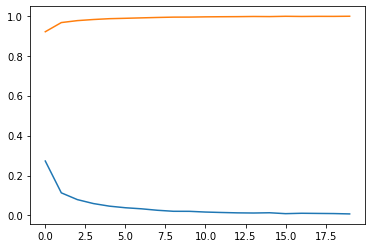

In [89]:
# Gráfico para visualizar os erros e accuracy
modelo_param.history_.keys()
#evolução do erro, azul
plt.plot(modelo_param.history_['loss'])
#performance da rede
plt.plot(modelo_param.history_['accuracy'])

Realizando as Previsões

In [91]:
prev_param = modelo_param.predict(X_test)
prev_param

438/438 [==============================] - 1s 1ms/step


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Matriz de Confusão do Modelo Melhor Parametrizado de acordo com o Grid Search

In [92]:
y_teste_matriz_param = [np.argmax(t) for t in y_test]
y_previsoes_matriz_param = [np.argmax(t) for t in previsoes]
confusao_param = confusion_matrix(y_teste_matriz_param, y_previsoes_matriz_param)
confusao_param

array([[1373,    0,    2,    1,    0,    2,    7,    0,    2,    0],
       [   0, 1560,    2,    3,    0,    0,    4,    2,    8,    1],
       [   3,    3, 1415,    3,    4,    2,    1,    8,    3,    1],
       [   1,    6,   25, 1360,    0,   30,    0,    6,    4,    3],
       [   3,    1,    3,    1, 1311,    0,    8,    8,    0,   15],
       [   1,    1,    3,    6,    0, 1200,    7,    1,    8,    4],
       [   9,    0,    1,    0,    2,   11, 1362,    0,    2,    0],
       [   1,    6,   16,    1,    4,    3,    0, 1418,    2,    7],
       [  10,   18,    9,    6,    3,   10,    3,    0, 1302,    7],
       [   4,    0,    0,    6,   15,    9,    0,   14,    5, 1308]])

Para a previsão de um único digito utilizei o mesmo número do modelo criado anteriormente para comparação

In [93]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 5
y_treino[20]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

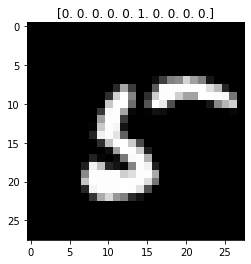

In [114]:
#passo a mesma posição para o modelo prever
novo_param = X_treino[20]
#de matriz para vetor
novo_param = np.expand_dims(novo_param, axis = 0)
novo_param

plt.imshow(np.reshape(X_treino[20], (28,28)), cmap = 'gray') #Imagem a ser Prevista
plt.title(y_treino[20])

Previsão do Numero 5

In [104]:
#previsao
pred_param = modelo_param.predict(novo_param)
#maior valor
pred_param = [np.argmax(pred_param) for r in pred_param]
print("O Valor Previsto é:  ", pred_param)

1/1 [==============================] - 0s 22ms/step
O Valor Previsto é:   [5]


Representação da Previsão do Número de Forma Gráfica

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

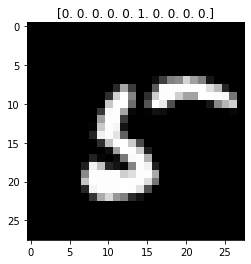

In [110]:
cinco = np.reshape(novo_param, (28, 28)) #Fiz um reshape no array para poder imprimir a imagem
plt.imshow(cinco, cmap = 'gray')
plt.title(y_treino[20])

# PARTE 2

A) Neste projeto foram usados dois modelos de classificação:

O primeiro modelo obteve uma acurácia 97.21%. O segundo modelo obteve uma acurácia de 99,73%

B) Sim. Ambos os modelos obtiveram performances satisfatórias como visto nos gráficos e nas matrizes de confusão. Com os dados de testes as previsões propostas forma bem sucedidas.

C) Quando utilizado o Grid Search os Paramentros mais adequados de acordo com o moddelo foram:  {'model__dropout': 0, 'model__hidden_layer_sizes': (100,), 'optimizer__lr': 0.1}. No primeiro modelo com Cros Validation = 5, o último folder obteve melhor resultado, porém todos tiveram uma acurácia de mais de 96%. É importante Ressaltar que os paramêtros podem ser modificados, acrescentando-se ou removendo de acordo com cada caso. Para este propósito as performances foram satisfatórias. 

D) O entendimento dos modelos em si foram os maiores gargalos. Uma vez compreendidos os parametros e qual importância cada um possui, fica mais fácil a aplicação e manipulação destes modelos.

# PARTE 3

A) De acordo com minhas pesquisas um parâmetro de modelo é uma variável que possui uma configuração interna ao modelo em que os valores destes parâmetros podem ser estimados a partir dos dados inseridos neste modelo. Um bom exemplo de parâmetro de modelo são os pesos em uma rede neural artificial onde estes são gerados de forma algoritimica a medida que o modelo necessita ser melhorado. Outro exemplo seria o coeficiente de uma regressão linear ou logistica onde a inclinação da linha que traça os dados é obtida através dos próprios dados processados no modelo. Os hiperparâmetros são aqueles em geral, onde precisamos inserir manualmente (para facilitar o entendimento). No exemplo deste exercício os paramentros abaixo, podem ser considerados como hiperparâmetro:

params = {
    'optimizer__lr': [0.05, 0.1],
    'model__hidden_layer_sizes': [(100, ), (50, 50, )],
    'model__dropout': [0, 0.5],
}

Um algorítimo para busca de melhores hiperparâmetros são aqueles onde todas as possíveis parametrizações são testadas e aquela que possui melhor performance é retornada pelo algorítimo. 

B) Acredito que 4 dos principais desafios são:

1.   Tratar e entender os dados adequadamente;
2.   Encontrar hiperparâmetros que se façam sentido para o problema em questão;
3.   Entender os algorítimos de machine learning e deep learning;
4.   Poder computacional que comporte um grande volume de dados como no caso do big data. 




C) Isso ocorre por conta da super ajuste do modelo ou sub ajuste. 



1.   Trabalhar com mais dados (volume);
2.   Fazer uma divisão adequada entre treino e teste;
3.   Buscar una técnica de cross validation para treinar os dados de forma mais homogenea possível.



D) O conjunto de teste é um conjunto novo de dados não inseridos e processados pelo modelo. O mesmo deve ser usado para testar a acurácia do modelo em situações gerais. A generalização do modelo é muito importante para que ele entre em produção e gere resultados satisfatórios.

E) O conjunto de validação é usado para comparar diferentes modelos e hiperparametros. É muito comum nesses casos se utilizar o 'setseed' para que as amostrar estejam dentro de um padrão.

F) Pode ocorrer um super ajuste ao modelo de teste perdendo assim a generalização do modelo. Os dados de teste são dados fora do contexto do modelo e são uma forma de parametrização para uma boa generalização do modelo.